# Dependencies
Install **anaconda** is recommended

| Name             | Version | Numpy & Python Version   |             |
| ---------------- |---------|--------------------------|-------------|
| cassandra-driver | 3.11.0  |      py35_1              | conda-forge |
| pandas           | 0.19.1  | np111py35_0              |             | 
| scikit-learn     | 0.18.1  | np111py35_0              |             |
| scipy            | 0.18.1  | np111py35_0              |             |
| matplotlib       | 2.0.0   | np111py35_0              |             |

In [1]:
'''
commands.
'''

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
'''
Parameters. 
Parameters that are defined in this cell can be injected and overwritten by the machine learning platform.
'''

# MLP defined parameters 
training_runner = None
project_id = None
training_id = None
metrics_feedback_url = None
model_file = None

# user defined parameters

# label keys
label = 'success'
# model file directory
work_dir = '/var/spark/ml_files/'
model_type = 'ML-TOD'
model_id = 'ML-TOD-2'
# start_date = '2019-09-01'
# end_date = '2019-12-31'

# data
# training_data = work_dir + 'tod_all_fields_2019_06.csv'

# features
input_features = {
            "billing_country": {
                "type": "string"
            },
            "bin": {
                "type": "string"
            },
            "bank_name": {
                "type": "string"
            },
            "card_brand": {
                "type": "string"
            },
            "card_category": {
                "type": "string"
            },
            "card_class": {
                "type": "string"
            },
            "card_usage": {
                "type": "string"
            },
            "day_of_month": {
                "type": "integer"
            },
            "funding_source": {
                "type": "string"
            },
            "issuer_country": {
                "type": "string"
            },
            "billing_country": {
                "type": "string"
            },
            "merchant_number": {
                "type": "string"
            },
            "payment_amount_usd": {
                "type": "number"
            },
            "payment_currency": {
                "type": "string"
            },
            "payment_method_id": {
                "type": "string"
            },
            "payment_service_id": {
                "type": "string"
            },
            "site_id": {
                "type": "string"
            },
            "transaction_date_in_string": {
                "type": "string"
            },
            "duration": {
                "type": "integer"
            },
            "segment_num": {
                "type": "integer"
            },
            "sub_age": {
                "type": "integer"
            }
}

features_cat = ['bin',  
                'segment_num_group', 
                'sub_duration_group',  
                'sub_age_group',
                'renew_att_num',
                'site_id',
                'funding_source',
                'card_brand',
                'transaction_hour',
                'payment_currency']  #, 'txn_hour_group', 'funding_source', 'card_brand', 'duration', 'segment_num', 'merchant_number' , 'bank_name', 'card_category',
features_float = ['bin', 'renew_att_num']
features_num = [ 
    'payment_amount_usd'
]
# 'payment_amount_usd'
# 'duration', 
#     'sub_age',
#     'segment_num'

features_num_encoded = []
features_num_calculated = []

features_cat_encoded = ['txn_hour_min_segment', 'week_of_month', 'day_of_week', 'txn_hour_group',
                        'segment_num_group', 
                        'sub_duration_group',  
                        'sub_age_group',
                        'is_first_renewal'] 

features_encoded = features_cat_encoded + features_num_encoded

# features_grouped = [['txn_hour_min_segment', 'bin'], 
#                     ['txn_hour_min_segment', 'payment_service_id'],
#                     ['txn_hour_min_segment', 'bank_name'], 
#                     ['txn_hour_min_segment', 'day_of_week'],
#                     ['txn_hour_min_segment', 'day_of_month'],
#                     ['txn_hour_min_segment', 'week_of_month'],
#                     ['txn_hour_min_segment'],
#                     ['txn_hour_group', 'bin'],
#                     ['transaction_hour', 'bin'], 
#                     ['transaction_hour', 'payment_service_id'],
#                     ['transaction_hour', 'bank_name'], 
#                     ['transaction_hour', 'day_of_week'],
#                     ['transaction_hour', 'day_of_month'],
#                     ['transaction_hour', 'week_of_month']
#                    ]

# features_grouped = [
#                     ['bank_name', 'card_category'],
#                     ['txn_hour_group', 'payment_service_id'],
#                     ['payment_service_id', 'merchant_number'],
#                     ['txn_hour_min_segment', 'payment_service_id'],
#                     ['txn_hour_group', 'day_of_week'],
#                     ['txn_hour_group', 'week_of_month'],
#                     ['txn_hour_group', 'day_of_month'],
#                     ['card_brand', 'funding_source'],
#                     ['txn_hour_min_segment'],
#                     ['txn_hour_min_segment', 'bin']
#                    ]

features_grouped = [
                    ['bank_name', 'card_category'],
                    ['payment_service_id', 'merchant_number'],
                    ['txn_hour_group', 'payment_service_id'],                    
                    ['txn_hour_min_segment'],
                    ['txn_hour_group'],
                    ['transaction_hour', 'day_of_week'],
                    ['transaction_hour', 'funding_source'],
                    ['txn_hour_min_segment', 'payment_service_id'],
                    ['transaction_hour', 'bin'],
                    ['txn_hour_group', 'day_of_week'],
                    ['txn_hour_group', 'funding_source']
                   ]

#                     ['payment_method_id', 'issuer_country'],

#                     ['site_id', 'payment_method_id', 'payment_currency', 'issuer_country'],
#                     ['txn_hour_min_segment', 'site_id', 'payment_method_id', 'payment_currency', 'issuer_country'],
#                     ['txn_hour_group', 'site_id', 'payment_method_id', 'payment_currency', 'issuer_country'] 

#                     ['txn_hour_min_segment', 'payment_service_id'],
#                     ['payment_service_id', 'merchant_number'],
#                             ['txn_hour_group', 'payment_service_id'],


# features_grouped = [
#                     ['bank_name', 'card_category'],
#                     ['payment_service_id'],
#                     ['payment_service_id', 'merchant_number'],
#                     ['day_of_week'],
#                     ['week_of_month'],
#                     ['day_of_month'],
#                     ['card_brand', 'funding_source'],
#                     ['txn_hour_group'],
#                     ['transaction_hour'],
#                     ['txn_hour_min_segment']
#                    ]


#                      ['txn_hour_min_segment', 'bank_name'],
#                     ['txn_hour_group', 'bank_name'],


additional_fields =  [ 'payment_amount_usd' ,'issuer_country', 'billing_country', 'day_of_month', 'site_id', 'merchant_number', 'transaction_hour',
                'payment_service_id', 'bin', 'payment_currency', 'bank_name', 'transaction_date_in_string',  'card_category', 'card_brand', 'funding_source', 'payment_method_id']

feature_candidates = [ 'card_brand', 'issuer_country', 'day_of_month', 'site_id', 'merchant_number', 'transaction_hour', 'funding_source',
                'payment_service_id', 'bin', 'payment_currency', 'bank_name', 'card_category', 'date_increment', 'decline_type', 'payment_amount_usd', 'payment_method_id']


usecols = feature_candidates +  ['renew_att_num', 'cid' ,'payment_amount_usd', 'new_status', 'response_message', 'subscription_id', 'subsegment_id','success', 'cid' , 'received_date', 'billing_country', 'transaction_date_in_string', 'cc_expiration_date']

scale_pos_weight = 1
tuned_parameters = {}

best_parameters = {
              'depth': 5,
              'iterations': 1201,
              'random_seed': 7,
              'scale_pos_weight': scale_pos_weight,
              'subsample': 0.4,
              'bagging_temperature': 4.5,
              'rsm': 0.45,
              'eval_metric': 'AUC:hints=skip_train~false',
              'early_stopping_rounds': 800,
              'model_size_reg': 2.0,
              'l2_leaf_reg': 19.9,
              'random_strength': 5.0
              }


#  'l2_leaf_reg': 20.9,

# training_data_paths =  ['tod_all_fields_2019-08.csv', 'tod_all_fields_2019-09.csv', 'tod_all_fields_2019-10.csv', 
#                         'tod_all_fields_2019-11.csv', 'tod_all_fields_2019-12.csv', 'tod_all_fields_2020-01.csv', 
#                         'tod_all_fields_2020-02.csv', 'tod_all_fields_2020-03.csv', 'tod_all_fields_2020-04.csv',
#                         'tod_all_fields_2020-06.csv']
training_data_paths =  ['tod_all_fields_2020-09.csv', 'tod_all_fields_2020-10.csv']
eval_data_paths = ['tod_all_fields_2020-09.csv']
test_data_paths = ['tod_all_fields_2020-10.csv']

subs_creation_date_files_2019 = [
     'subs_subscription_creation_date_2017_01_2017_12.csv', 
     'subs_subscription_creation_date_2018_01_2018_05.csv',
     'subs_subscription_creation_date_2018_06_2018_12.csv',
     'subs_subscription_creation_date_2019_01_2019_12.csv']

subs_creation_date_files = [
    'subs_subscription_creation_date_2020-01.csv',
    'subs_subscription_creation_date_2020-02.csv',
    'subs_subscription_creation_date_2020-03.csv',
    'subs_subscription_creation_date_2020-04.csv',
    'subs_subscription_creation_date_2020-05.csv',
    'subs_subscription_creation_date_2020-06.csv',
    'subs_subscription_creation_date_2020-07.csv',
    'subs_subscription_creation_date_2020-08.csv',
    'subs_subscription_creation_date_2020-09.csv',
    'subs_subscription_creation_date_2020-10.csv'
]

subs_files = [
    'subs_subscription_2018_12_to_2020_01.csv', 
    'subs_li_item_2020-02.csv',  
    'subs_li_item_2020-03.csv',
    'subs_li_item_2020-04.csv',
    'subs_li_item_2020-05.csv',  
    'subs_li_item_2020-06.csv',
    'subs_li_item_2020-07.csv',
    'subs_li_item_2020-08.csv',
    'subs_li_item_2020-09.csv',
    'subs_li_item_2020-10.csv'
]

sub_seg_expire_files = [
    'sub_seg_expire_2019_all.csv', 
    'sub_seg_expire_2020_01.csv',
    'sub_seg_expire_2020-02.csv',
    'sub_seg_expire_2020-03.csv',
    'sub_seg_expire_2020-04.csv',
    'sub_seg_expire_2020-05.csv',
    'sub_seg_expire_2020-06.csv',
    'sub_seg_expire_2020-07.csv',
    'sub_seg_expire_2020-08.csv',
    'sub_seg_expire_2020-09.csv',
    'sub_seg_expire_2020-10.csv'
]

'''data  conditions'''

exclude_decline_types = ['invalid_account', 'invalid_cc', 'invalid_txn','correct_cc_retry', 'expired_card']
excluded_processors = ['paypalExpress'] #['mes', 
# included_site_ids = ['kasperbr'] #['kasperbr']
included_billing_countries = ['BR']

In [3]:
'''
imports.
'''

#import for training
import numpy as np
from sklearn import cross_validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn import cross_validation
from sklearn import ensemble
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
# from spark_sklearn import GridSearchCV
from sklearn.preprocessing import label_binarize

# from src.web.utils import PreProcessing
from src.web.preprocessing import PreProcessing
# from src.web.encoder import EnhancedLeaveOneOutEncoder
from src.web.train_util import *

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
'''
configurations.
'''
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 100

In [5]:
from src.web.utils import to_date
from src.web.utils import days_between
from src.web.utils import is_expired

def days_between_period(df):
    d1 = to_date(df['next_renewal_date'])
    d2 = to_date(df['grace_period_date'])
    return abs((d2 - d1).days)

# def process_data(df):
#     df = df[~(df['payment_service_id'].isin(excluded_processors))]
#     df = df[~df['payment_amount_usd'].isna()]
# #     df = df[~(df['new_status'] == 'Reversed')]
# #     df = df[df.site_id.isin(included_site_ids)]
#     df = df[df.billing_country.isin(included_billing_countries)]

#     df['bin'] = df['bin'].fillna('').astype(str).str.replace('.0', '', regex=False)
    
#     return df
    
def process_data(dca_df, df_sub, df_sub_seg, df_creation_date):
    df = dca_df.copy()
#     df = df[df.site_id.isin(included_site_ids)]
    df = df[df.billing_country.isin(included_billing_countries)]

    df_amex = df[(df.payment_service_id == 'mes') & (df.card_brand.isin(['American Express', 'Discover']))] 

    df = df
    df = df[~(df.payment_service_id.isin(excluded_processors))]
    df = df[df['date_increment'].isna()]
    df['subsegment_id'] = df['subsegment_id'].astype(int)
#     df = df[~(df['new_status'] == 'Reversed')]    
    df = df[~df['payment_amount_usd'].isna()]
    df = pd.merge(df, df_sub[['subsegment_id', 'renewal_window', 'grace_period_date', 'next_renewal_date']], left_on='subsegment_id', right_on='subsegment_id', how='left')
    df = pd.merge(df, df_sub_seg[['subsegment_id', 'duration', 'segment_num']], left_on='subsegment_id', right_on='subsegment_id', how='left')

    
#     df['is_expired'] = df.apply(is_expired, axis=1)
#     df.loc[~df['date_increment'].isna(), 'is_expired'] = True

#     df = df[~(df.duration.isna())]
#     df = df[~(df['bin'] == 'nan')]
#     df = df[~(df['cc_expiration_date'] == 'nan')]
    
    df = pd.concat([df, df_amex])
    df = pd.merge(df, df_creation_date, left_on='subscription_id', right_on='subscription_id', how='left')
    df.subs_activation_date.fillna('2017-01-01 00:00:00', inplace=True)
    df['sub_age'] = df.apply(lambda x: days_between(x.transaction_date_in_string, x.subs_activation_date), axis=1)
    
    return df

In [6]:

subs_creation_date_2019 =  pd.concat((read_from(file, s3_dir='ml_files') for file in subs_creation_date_files_2019) , ignore_index=True)
subs_creation_date_2019 = subs_creation_date_2019.rename(columns={"SUBSCRIPTION_ID": "subscription_id", "CREATION_DATE": "subs_activation_date"})

subs_creation_date =  pd.concat((read_from(file, s3_dir='ml_files') for file in subs_creation_date_files) , ignore_index=True)
# subs_creation_date = subs_creation_date.rename(columns={"SUBSCRIPTION_ID": "subscription_id", "CREATION_DATE": "subs_activation_date"})

subs_creation_date =  pd.concat([subs_creation_date, subs_creation_date_2019])
subs_creation_date.head()

,subscription_id,subs_activation_date
0,13824581610,2020-01-24 13:49:26
1,13835225210,2020-01-27 11:57:02
2,13749247110,2020-01-06 07:01:08
3,13847169310,2020-01-30 11:12:54
4,13830408310,2020-01-26 08:20:54


In [7]:

df_subs =  pd.concat((read_from(file, s3_dir='training_files') for file in subs_files) , ignore_index=True)

df_subs.head()

,subsegment_id,next_renewal_date,grace_period_date,segment_number,line_item_type,renewal_window
0,17904709400,2018-12-15,2018-12-26,8.0,RENEWED,11
1,17958051000,2018-12-20,2019-01-19,2.0,RENEWED,30
2,17795605900,2018-12-04,2019-01-03,7.0,RENEWED,30
3,14777236400,2018-12-04,2018-12-19,NaN,RENEWED,15
4,15218507800,2019-01-27,2019-02-20,NaN,RENEWED,24


In [8]:
df_sub_seg_expire =  pd.concat((read_from(file) for file in sub_seg_expire_files) , ignore_index=True).drop_duplicates(subset=['subsegment_id'], keep='first')

In [9]:
# training_data_paths = ['tod_all_fields_2019_09.csv', 'tod_all_fields_2019_10.csv', 'tod_all_fields_2019_11.csv']
# training_data_paths =  ['tod_all_fields_2019_11.csv']

df_train =  pd.concat((read_from( file, usecols=usecols, s3_dir='ml_files') for file in training_data_paths) , ignore_index=True)
# df_train = process_data(df_train)
df_train = process_data(df_train, df_subs, df_sub_seg_expire, subs_creation_date)
print(training_data_paths)
df_train.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/concat.py:284: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,


['tod_all_fields_2020-09.csv', 'tod_all_fields_2020-10.csv']


(290773, 34)

In [10]:
df_train[df_train.received_date >= '2020-09-16'].transaction_hour.value_counts()

9     20155
10    13376
11    13077
12    12976
17    12290
8     11401
5     11169
6     11124
7     11013
1     10875
2     10845
4     10275
3      7514
16     7474
14     7179
0      6418
23     5934
13     5872
15     5840
22     5174
18     4915
21     4911
19     4760
20     4536
Name: transaction_hour, dtype: int64

In [11]:
# gp = df_train[df_train.received_date == '2020-10-17'].groupby(['transaction_hour'])
# df_gp = gp.agg({'success':['sum', 'count'], 'subsegment_id':['nunique']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
# df_gp.columns = df_gp.columns.droplevel(0)
# df_gp = df_gp.rename(columns={'sum': 'success',  'nunique': 'num_of_subs'})
# df_gp[df_gp['num_of_subs'] > 10].sort_values(by=['success_rate', 'num_of_subs'], ascending=False)

In [12]:
gp = df_train[df_train.received_date == '2020-09-28'].groupby(['transaction_hour'])
df_gp = gp.agg({'success':['sum', 'count'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
df_gp.columns = df_gp.columns.droplevel(0)
df_gp = df_gp.rename(columns={'sum': 'success',  'nunique': 'num_of_subs'})
df_gp[df_gp['num_of_subs'] > 10].sort_values(by=['success_rate', 'num_of_subs'], ascending=False)

,success,count,num_of_subs,success_rate
transaction_hour,,,,
21,115,134,126,91.269841
19,126,150,139,90.647482
18,125,154,140,89.285714
22,111,138,127,87.401575
3,449,574,523,85.850860
10,477,632,561,85.026738
20,118,159,139,84.892086
11,185,251,222,83.333333
14,91,127,112,81.250000


In [13]:
df_train.decline_type.value_counts(normalize=True)

Base                       0.481468
Hard Fraud                 0.264093
txn_refused                0.105409
do_not_honor               0.097371
Insufficient Funds         0.036812
invalid_account            0.008106
expired_card               0.002442
Stop Recurring             0.002153
restricted_card            0.000746
not_permitted              0.000526
invalid_txn                0.000299
server error               0.000244
generic decline            0.000134
try again later            0.000093
declined non generic       0.000076
do not try again           0.000014
international filtering    0.000003
blocked                    0.000003
invalid merchant           0.000003
no charge model found      0.000003
Name: decline_type, dtype: float64

In [14]:
df_train[df_train.renew_att_num == 1].success.value_counts(normalize=True)

1    0.682678
0    0.317322
Name: success, dtype: float64

In [15]:
gp = df_train[(df_train.received_date >= '2020-09-16') & (df_train.renew_att_num == 1)].groupby(['transaction_hour'])
df_gp = gp.agg({'success':['sum', 'count'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
df_gp.columns = df_gp.columns.droplevel(0)
df_gp = df_gp.rename(columns={'sum': 'success',  'nunique': 'num_of_subs'})
df_gp[df_gp['num_of_subs'] > 10].sort_values(by=['success_rate', 'num_of_subs'], ascending=False)

,success,count,num_of_subs,success_rate
transaction_hour,,,,
21,3150,3797,3514,89.641434
22,2848,3616,3288,86.618005
18,2672,3477,3099,86.221362
23,3568,4595,4145,86.079614
0,2684,3470,3160,84.936709
2,5281,6984,6236,84.685696
20,2924,3901,3466,84.362377
1,5346,7075,6367,83.964190
5,5487,7467,6593,83.224632


In [16]:
gp = df_train[df_train.received_date >= '2020-09-16'].groupby(['transaction_hour'])
df_gp = gp.agg({'success':['sum', 'count'], 'subsegment_id':['nunique']})
df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
df_gp.columns = df_gp.columns.droplevel(0)
df_gp = df_gp.rename(columns={'sum': 'success',  'nunique': 'num_of_subs'})
df_gp[df_gp['num_of_subs'] > 10].sort_values(by=['success_rate', 'num_of_subs'], ascending=False)

,success,count,num_of_subs,success_rate
transaction_hour,,,,
21,3276,4911,4064,80.610236
20,3004,4536,3782,79.428874
23,3713,5934,4680,79.337607
22,3002,5174,3930,76.386768
19,2838,4760,3804,74.605678
18,2800,4915,3836,72.992701
1,5598,10875,8109,69.034406
17,6430,12290,9351,68.762699
5,5798,11169,8522,68.035672


In [17]:
# eval_data_paths = ['tod_all_fields_2019_12.csv']
# df_eval =  read_from(eval_data_path, usecols=usecols)
df_eval = df_train[(df_train.received_date >= '2020-10-27') & (df_train.received_date < '2020-10-30')]


# df_eval =  pd.concat((read_from( file, usecols=usecols, s3_dir='ml_files') for file in eval_data_paths) , ignore_index=True)
# df_eval = process_data(df_eval, df_subs, df_sub_seg_expire, subs_creation_date)

print(df_eval.shape)


(16477, 34)


In [18]:
df_test = df_train[(df_train.received_date >= '2020-10-30')]


# df_test =  pd.concat((read_from( file, usecols=usecols, s3_dir='ml_files') for file in test_data_paths) , ignore_index=True)
# df_test = process_data(df_test, df_subs, df_sub_seg_expire, subs_creation_date)


df_test.shape

(8758, 34)

In [19]:
# df_sub_seg_expire =  pd.concat((read_from(file) for file in sub_seg_expire_files) , ignore_index=True).drop_duplicates(subset=['subsegment_id'], keep='first')
# # df_sub_seg_expire_2020 = pd.read_csv(WORK_DIR + 'sub_seg_expire_2020_01_2020_02.csv')

# df_train = pd.merge(df_train, df_sub_seg_expire[['subsegment_id', 'duration', 'segment_num']], left_on='subsegment_id', right_on='subsegment_id', how='left')
# df_eval = pd.merge(df_eval, df_sub_seg_expire[['subsegment_id', 'duration', 'segment_num']], left_on='subsegment_id', right_on='subsegment_id', how='left')
# df_test = pd.merge(df_test, df_sub_seg_expire[['subsegment_id', 'duration', 'segment_num']], left_on='subsegment_id', right_on='subsegment_id', how='left')


In [20]:
# gp = df_train.groupby(['site_id'])
# df_gp = gp.agg({'success':['sum', 'count'], 'subsegment_id':['nunique']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
# df_gp.columns = df_gp.columns.droplevel(0)
# df_gp = df_gp.rename(columns={'sum': 'success',  'nunique': 'num_of_subs'})
# df_gp[df_gp['num_of_subs'] > 50].sort_values(by=['success_rate', 'num_of_subs'], ascending=False)

In [21]:
# gp = df_train.groupby(['transaction_hour'])
# df_gp = gp.agg({'success':['sum', 'count'], 'subsegment_id':['nunique']})
# df_gp[('','success_rate')] = df_gp[('success', 'sum')] / df_gp[('subsegment_id', 'nunique')] * 100
# df_gp.columns = df_gp.columns.droplevel(0)
# df_gp = df_gp.rename(columns={'sum': 'success',  'nunique': 'num_of_subs'})
# df_gp[df_gp['num_of_subs'] > 50].sort_values(by=['success_rate', 'num_of_subs'], ascending=False)

In [22]:
df_train.transaction_hour.value_counts()

1     34179
0     29559
9     21469
10    14791
11    14363
12    14285
2     13631
17    13459
8     12650
5     12479
6     12397
7     12264
4     10882
16     8546
3      8322
14     8312
13     7024
15     6912
22     6688
18     5954
23     5935
19     5791
20     5583
21     5298
Name: transaction_hour, dtype: int64

In [23]:
df_eval.transaction_hour.value_counts()

9     2464
14    2180
16    1254
13    1251
10     753
19     654
6      604
7      579
23     577
12     520
15     512
20     494
21     477
8      460
5      456
4      453
11     451
17     433
2      428
22     405
3      378
1      355
18     316
0       23
Name: transaction_hour, dtype: int64

In [24]:
df_test.head()

,subscription_id,subsegment_id,card_brand,funding_source,cc_expiration_date,day_of_month,issuer_country,site_id,merchant_number,transaction_hour,payment_service_id,payment_method_id,bin,bank_name,renew_att_num,transaction_date_in_string,payment_currency,payment_amount_usd,date_increment,received_date,new_status,response_message,cid,card_category,billing_country,success,decline_type,renewal_window,grace_period_date,next_renewal_date,duration,segment_num,subs_activation_date,sub_age
245860,10012356801,24747575400,MasterCard,Credit,226,30,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,16,pagador,MasterCard,515590.0,BANCO SANTANDER (BRASIL) S.A.,2,2020-10-30 16:00:04,BRL,6.0526,NaN,2020-10-30,Completed,0:Successful,NaN,Platinum MasterCard Card,BR,1,Base,30.0,2020-11-22,2020-10-23,31.0,42.0,2017-04-23 08:00:20,1286
245861,10013448201,24747574900,MasterCard,Credit,1221,30,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,1,pagador,MasterCard,554906.0,"BANCO DO BRASIL, S.A.",2,2020-10-30 01:15:01,BRL,18.1578,NaN,2020-10-30,Completed,0:Successful,NaN,Platinum MasterCard Card,BR,1,Base,30.0,2020-11-22,2020-10-23,31.0,42.0,2017-04-23 16:55:49,1286
245862,10013500301,24747759500,MasterCard,Credit,724,30,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,16,pagador,MasterCard,546056.0,ITAU UNIBANCO S.A.,2,2020-10-30 16:00:01,BRL,6.0526,NaN,2020-10-30,Declined,7: Do Not Honor,NaN,Platinum MasterCard Card,BR,0,do_not_honor,30.0,2020-11-22,2020-10-23,30.0,42.0,2017-04-23 16:41:54,1286
245863,10013500301,24747759500,MasterCard,Credit,724,30,BR,adbehbr,1883448942-BRL-pacific,16,drwp-br,MasterCard,546056.0,ITAU UNIBANCO S.A.,2,2020-10-30 16:00:03,BRL,6.0526,NaN,2020-10-30,Declined,27001: Transaction refused[63] [null] [] [],RETRY_DECLINED.2,Platinum MasterCard Card,BR,0,Hard Fraud,30.0,2020-11-22,2020-10-23,30.0,42.0,2017-04-23 16:41:54,1286
245864,10064852601,24616609300,MasterCard,Credit,228,30,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,16,pagador,MasterCard,553636.0,ITAU UNIBANCO S.A.,4,2020-10-30 16:30:01,BRL,6.0526,NaN,2020-10-30,Declined,7:Denied,NaN,MasterCard Black Card,BR,0,Hard Fraud,30.0,2020-11-08,2020-10-09,30.0,41.0,2017-05-09 12:35:08,1270


In [25]:
'''
data manipulation.
'''
df_train = df_train[(df_train.received_date < '2020-10-29')]
df_train = df_train[df_train['date_increment'].isna()]
df_train = df_train[~(df_train['decline_type'].isin(exclude_decline_types))]

df_eval = df_eval[df_eval['date_increment'].isna()]
df_eval = df_eval[~(df_eval['decline_type'].isin(exclude_decline_types))]

df_test = df_test[df_test['date_increment'].isna()]
df_test = df_test[~(df_test['decline_type'].isin(exclude_decline_types))]

#Exclude some data
# df_train = df_train[~(df_train['bin'] == 'nan')]
# df_eval = df_eval[~(df_eval['bin'] == 'nan')]
# df_test = df_test[~(df_test['bin'] == 'nan')]

# df_train = df_train[~(df_train['cc_expiration_date'] == 'nan')]
# df_eval = df_eval[~(df_eval['cc_expiration_date'] == 'nan')]
# df_test = df_test[~(df_test['cc_expiration_date'] == 'nan')]

In [26]:
# txn_hour_group = [0,2, 6, 10, 14, 18, 22, 25]
txn_hour_group = [0, 1, 7, 13, 19, 24]


df_train['txn_hour_group'] = pd.cut(df_train['transaction_hour'], txn_hour_group).astype(str).str.replace('.0', '', regex=False)
df_eval['txn_hour_group'] = pd.cut(df_eval['transaction_hour'], txn_hour_group).astype(str).str.replace('.0', '', regex=False)
df_test['txn_hour_group'] = pd.cut(df_test['transaction_hour'], txn_hour_group).astype(str).str.replace('.0', '', regex=False)


In [27]:
segment_num_group = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 15, 20, 25, 30, 40, 50, 70, 100, 150]

df_train['segment_num_group'] = pd.cut(df_train['segment_num'], segment_num_group).astype(str).str.replace('.0', '', regex=False)
df_eval['segment_num_group'] = pd.cut(df_eval['segment_num'], segment_num_group).astype(str).str.replace('.0', '', regex=False)
df_test['segment_num_group'] = pd.cut(df_test['segment_num'], segment_num_group).astype(str).str.replace('.0', '', regex=False)


In [28]:
df_train['is_first_renewal'] = (df_train['segment_num'] < 2) & (df_train['segment_num'] >= 0)
df_eval['is_first_renewal'] = (df_eval['segment_num'] < 2) & (df_eval['segment_num'] >= 0)
df_test['is_first_renewal'] = (df_test['segment_num'] < 2) & (df_test['segment_num'] >= 0)

df_train.loc[(df_train.card_brand.str.lower().str.startswith('american', na=False)), 'card_category'] = 'american_express'
df_eval.loc[(df_eval.card_brand.str.lower().str.startswith('american', na=False)), 'card_category'] = 'american_express'
df_test.loc[(df_test.card_brand.str.lower().str.startswith('american', na=False)), 'card_category'] = 'american_express'

In [29]:
df_train.loc[(df_train['duration'] == 28) | (df_train['duration'] == 29) | (df_train['duration'] == 31) , 'duration'] = 30
df_train.loc[(df_train['duration'] == 366) , 'duration'] = 365
df_train.loc[(df_train['duration'] == 731) , 'duration'] = 730

df_eval.loc[(df_eval['duration'] == 28) | (df_eval['duration'] == 29) | (df_eval['duration'] == 31) , 'duration'] = 30
df_eval.loc[(df_eval['duration'] == 366) , 'duration'] = 365
df_eval.loc[(df_eval['duration'] == 731) , 'duration'] = 730

df_test.loc[(df_test['duration'] == 28) | (df_test['duration'] == 29) | (df_test['duration'] == 31) , 'duration'] = 30
df_test.loc[df_test['duration'] == 366 , 'duration'] = 365
df_test.loc[(df_test['duration'] == 731) , 'duration'] = 730

In [30]:
duration_group = [0, 3, 6, 9, 13, 17, 20, 25, 27, 33, 39, 43, 62, 70, 80, 88, 94, 100, 118, 125, 130, 146, 155, 176, 184, 200, 213, 230, 263, 300, 363, 368, 373,729, 733, 1000, 2000]

df_train['sub_duration_group'] = pd.cut(df_train['duration'], duration_group).astype(str).str.replace('.0', '', regex=False) 
df_eval['sub_duration_group'] = pd.cut(df_eval['duration'], duration_group).astype(str).str.replace('.0', '', regex=False) 
df_test['sub_duration_group'] = pd.cut(df_test['duration'], duration_group).astype(str).str.replace('.0', '', regex=False) 

df_train['sub_age_group'] = pd.cut(df_train['sub_age'], duration_group).astype(str).str.replace('.0', '', regex=False) 
df_eval['sub_age_group'] = pd.cut(df_eval['sub_age'], duration_group).astype(str).str.replace('.0', '', regex=False) 
df_test['sub_age_group'] = pd.cut(df_test['sub_age'], duration_group).astype(str).str.replace('.0', '', regex=False)

In [31]:
df_train.head()

,subscription_id,subsegment_id,card_brand,funding_source,cc_expiration_date,day_of_month,issuer_country,site_id,merchant_number,transaction_hour,payment_service_id,payment_method_id,bin,bank_name,renew_att_num,transaction_date_in_string,payment_currency,payment_amount_usd,date_increment,received_date,new_status,response_message,cid,card_category,billing_country,success,decline_type,renewal_window,grace_period_date,next_renewal_date,duration,segment_num,subs_activation_date,sub_age,txn_hour_group,segment_num_group,is_first_renewal,sub_duration_group,sub_age_group
0,10014476301,24458594600,MasterCard,Credit,721,24,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,4,pagador,MasterCard,516292.0,NU PAGAMENTOS SA,1,2020-09-24 04:45:07,BRL,19.034079,NaN,2020-09-24,Completed,0:Successful,NaN,Platinum MasterCard Card,BR,1,Base,30.0,2020-10-24,2020-09-24,30.0,41.0,2017-04-24 06:22:48,1249,"(1, 7]","(40, 50]",False,"(27, 33]","(1000, 2000]"
1,10014624401,24458590400,MasterCard,Credit,527,24,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,9,pagador,MasterCard,523421.0,NU PAGAMENTOS SA,1,2020-09-24 09:00:01,BRL,19.034079,NaN,2020-09-24,Completed,0:Successful,NaN,Gold MasterCard Card,BR,1,Base,30.0,2020-10-24,2020-09-24,30.0,41.0,2017-04-24 07:44:34,1249,"(7, 13]","(40, 50]",False,"(27, 33]","(1000, 2000]"
2,10014789301,24458635500,Visa,Credit,1121,24,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,2,pagador,Visa,498423.0,Banco do Brasil S.A.,1,2020-09-24 02:15:10,BRL,19.034079,NaN,2020-09-24,Completed,0:Successful,NaN,Visa Classic,BR,1,Base,30.0,2020-10-24,2020-09-24,30.0,41.0,2017-04-24 08:35:32,1249,"(1, 7]","(40, 50]",False,"(27, 33]","(1000, 2000]"
3,10014806201,24458567800,MasterCard,Credit,522,24,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,1,pagador,MasterCard,540593.0,CAIXA ECONOMICA FEDERAL,1,2020-09-24 01:15:32,BRL,6.344693,NaN,2020-09-24,Completed,0:Successful,NaN,(Unembossed) Standard MasterCard Card,BR,1,Base,30.0,2020-10-24,2020-09-24,30.0,41.0,2017-04-24 09:18:57,1249,"(0, 1]","(40, 50]",False,"(27, 33]","(1000, 2000]"
4,10014826001,24458672900,MasterCard,Credit,824,24,BR,adbehbr,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,1,pagador,MasterCard,546479.0,"BANCO DO BRASIL, S.A.",1,2020-09-24 01:15:09,BRL,6.344693,NaN,2020-09-24,Completed,0:Successful,NaN,(Unembossed) Standard MasterCard Card,BR,1,Base,30.0,2020-10-24,2020-09-24,30.0,41.0,2017-04-24 09:24:47,1249,"(0, 1]","(40, 50]",False,"(27, 33]","(1000, 2000]"


In [32]:
original_size = len(df_train)
balanced_size = len(df_train)
fail_size = df_train[label].value_counts(normalize=True)[0.0]
success_size =  df_train[label].value_counts(normalize=True)[1.0]

In [33]:
'''
feature manipulation and aggregation.
'''
features = features_cat + features_encoded

additional_fields = [x for x in additional_fields if x not in (features_cat + features_num)]
fields = features_cat + features_num +  additional_fields


features_dict = {'LABEL': label, 'FIELDS': fields ,'FEATURES_CAT': features_cat, 'FEATURES_NUM':features_num, 'FEATURES_ENCODED':features_encoded, 'FEATURES_NUM_ENCODED':features_num_encoded, 'FEATURES_NUM_CALCULATED':features_num_calculated, 'FEATURES_FLOAT': features_float}
features_dict_key = 'preprocessing__features_dict'
features_dict['FEATURES_GROUPED'] = features_grouped
features_dict['ADDITIONAL_FIELDS'] = additional_fields

features_dict['txn_hour_group'] = txn_hour_group



In [34]:
fields

['bin',
 'segment_num_group',
 'sub_duration_group',
 'sub_age_group',
 'renew_att_num',
 'site_id',
 'funding_source',
 'card_brand',
 'transaction_hour',
 'payment_currency',
 'payment_amount_usd',
 'issuer_country',
 'billing_country',
 'day_of_month',
 'merchant_number',
 'payment_service_id',
 'bank_name',
 'transaction_date_in_string',
 'card_category',
 'payment_method_id']

In [35]:
def over_sampling(df):
    print(df[label].value_counts(normalize=True))
    df_0 = df[df[label] == 0]
    df_1 = df[df[label] == 1]
    
    df_0_over = df_0.sample(int(len(df_1)/2), replace=True)
    df = pd.concat([df_0_over, df_1], axis=0, ignore_index=False)
    
    print(df[label].value_counts(normalize=True))
    print(df.shape)
    return df

In [36]:
'''filters data'''

# input_data = df_train[df_train.renew_att_num==1]
# _df_eval = df_eval[df_eval.renew_att_num==1]
# _df_test = df_test[df_test.renew_att_num==1]

input_data = df_train
_df_eval = df_eval
_df_test = df_test

# input_data = over_sampling(input_data)

# _df_eval = over_sampling(_df_eval)
# _df_test = over_sampling(_df_test)

In [37]:
scale_pos_weight

1

In [38]:
'''Prepares training parameters'''

from catboost import CatBoostClassifier, Pool
import src.web.preprocessing
from src.web.preprocessing import PreProcessing
from src.web.train_util import *
from importlib import import_module
import sys

classifier = CatBoostClassifier

cat_features_len = len(features_cat) +  len (features_grouped)

# scale_pos_weight = (input_data[label].value_counts(normalize=True)[0.0] / input_data[label].value_counts(normalize=True)[1.0] ) + 0.5
if not scale_pos_weight:
    scale_pos_weight = (input_data[label].value_counts(normalize=True)[0.0] / input_data[label].value_counts(normalize=True)[1.0] ) + 0.5

# scale_pos_weight = 1
best_parameters['scale_pos_weight'] = scale_pos_weight
    
features_dict['use_cat_encoder'] = False
_preProcessor = PreProcessing().fit(input_data, input_data['success'], features_dict=features_dict)            
_x_eval = _preProcessor.transform(_df_eval)
_y_eval = _df_eval["success"]

alg_name = 'catboostclassifier'


cat_features = list(range(0,cat_features_len))

fit_params = {
    f"{alg_name}__verbose": True,
    f"{alg_name}__cat_features": cat_features,
    f"{alg_name}__plot": True,
    f"{alg_name}__eval_set": Pool(_x_eval, _y_eval, cat_features)
}


features_dict['fit_params'] = fit_params



self.features_encoded: ['txn_hour_min_segment', 'week_of_month', 'day_of_week', 'txn_hour_group', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'is_first_renewal']
# Finish handle_feat_encoded.
self.features_all:  None
In fit, self.features_cat: ['bin', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'renew_att_num', 'site_id', 'funding_source', 'card_brand', 'transaction_hour', 'payment_currency']
['bin', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'renew_att_num', 'site_id', 'funding_source', 'card_brand', 'transaction_hour', 'payment_currency']
# not using cat encoder
# Finish handle_feat_encoded.
# transform_time: 0.017649412155151367
      bin segment_num_group sub_duration_group sub_age_group renew_att_num  \
0  421960           (40,50]            (27,33]   (1000,2000]             1   
1  498407           (40,50]            (27,33]   (1000,2000]             1   
2  458919           (40,50]            (27,33]   (1000,2000]             1   

In [39]:
'''
print out all parameters.
'''

print('training_runner = ', training_runner)
print('project_id =', project_id)
print('training_id =', training_id)
print('metrics_feedback_url =', metrics_feedback_url)
print('model_file =', model_file)
print('label =', label)
# print('training_data =', training_data)

print('training_data_paths =', training_data_paths)
print('eval_data_paths =', eval_data_paths)
print('test_data_paths =', test_data_paths)
print('sub_seg_expire_files =', sub_seg_expire_files)
print('exclude_decline_types =', exclude_decline_types)


'''
print out manipulated and aggregated features.
'''
print('\n============== training parameters & features ================ ')
print('input_features =', input_features)
print('additional_fields =', additional_fields)
print('tuned_parameters =', tuned_parameters)
print('best_parameters =', best_parameters)
print('features_cat =', features_cat)
print('features_float =', features_float)
print('features_num =', features_num)
print('features_grouped =', features_grouped)

print('feature_num_encoded', features_encoded)
print('features_encoded', features_encoded)
print('features_num_calculated', features_num_calculated)
print('fields', fields)
print('features_dict', features_dict)
print('features_dict_key', features_dict_key)

training_runner =  None
project_id = None
training_id = None
metrics_feedback_url = None
model_file = None
label = success
training_data_paths = ['tod_all_fields_2020-09.csv', 'tod_all_fields_2020-10.csv']
eval_data_paths = ['tod_all_fields_2020-09.csv']
test_data_paths = ['tod_all_fields_2020-10.csv']
sub_seg_expire_files = ['sub_seg_expire_2019_all.csv', 'sub_seg_expire_2020_01.csv', 'sub_seg_expire_2020-02.csv', 'sub_seg_expire_2020-03.csv', 'sub_seg_expire_2020-04.csv', 'sub_seg_expire_2020-05.csv', 'sub_seg_expire_2020-06.csv', 'sub_seg_expire_2020-07.csv', 'sub_seg_expire_2020-08.csv', 'sub_seg_expire_2020-09.csv', 'sub_seg_expire_2020-10.csv']
exclude_decline_types = ['invalid_account', 'invalid_cc', 'invalid_txn', 'correct_cc_retry', 'expired_card']

============== training parameters & features ================ 
input_features = {'billing_country': {'type': 'string'}, 'bin': {'type': 'string'}, 'bank_name': {'type': 'string'}, 'card_brand': {'type': 'string'}, 'card_category':

{'LABEL': 'success', 'FIELDS': ['bin', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'renew_att_num', 'site_id', 'funding_source', 'card_brand', 'transaction_hour', 'payment_currency', 'payment_amount_usd', 'issuer_country', 'billing_country', 'day_of_month', 'merchant_number', 'payment_service_id', 'bank_name', 'transaction_date_in_string', 'card_category', 'payment_method_id'], 'FEATURES_CAT': ['bin', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'renew_att_num', 'site_id', 'funding_source', 'card_brand', 'transaction_hour', 'payment_currency'], 'FEATURES_NUM': ['payment_amount_usd'], 'FEATURES_ENCODED': ['txn_hour_min_segment', 'week_of_month', 'day_of_week', 'txn_hour_group', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'is_first_renewal'], 'FEATURES_NUM_ENCODED': [], 'FEATURES_NUM_CALCULATED': [], 'FEATURES_FLOAT': ['bin', 'renew_att_num'], 'FEATURES_GROUPED': [['bank_name', 'card_category'], ['payment_service_id', 'merchant_number'], ['t

/var/spark/jupyter-notebooks/src/web/preprocessing.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')
/var/spark/jupyter-notebooks/src/web/preprocessing.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)


self.features_all:  None
In fit, self.features_cat: ['bin', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'renew_att_num', 'site_id', 'funding_source', 'card_brand', 'transaction_hour', 'payment_currency']
['bin', 'segment_num_group', 'sub_duration_group', 'sub_age_group', 'renew_att_num', 'site_id', 'funding_source', 'card_brand', 'transaction_hour', 'payment_currency']
# not using cat encoder
# Finish handle_feat_encoded.
# transform_time: 0.34383130073547363
      bin segment_num_group sub_duration_group sub_age_group renew_att_num  \
0  516292           (40,50]            (27,33]   (1000,2000]             1   
1  523421           (40,50]            (27,33]   (1000,2000]             1   
2  498423           (40,50]            (27,33]   (1000,2000]             1   
3  540593           (40,50]            (27,33]   (1000,2000]             1   
4  546479           (40,50]            (27,33]   (1000,2000]             1   

   site_id funding_source  card_brand transaction_h

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9344778	test: 0.9387605	best: 0.9387605 (0)	total: 238ms	remaining: 4m 45s
1:	learn: 0.9453588	test: 0.9466066	best: 0.9466066 (1)	total: 346ms	remaining: 3m 27s
2:	learn: 0.9470143	test: 0.9485442	best: 0.9485442 (2)	total: 428ms	remaining: 2m 50s
3:	learn: 0.9482547	test: 0.9496476	best: 0.9496476 (3)	total: 546ms	remaining: 2m 43s
4:	learn: 0.9483759	test: 0.9499093	best: 0.9499093 (4)	total: 645ms	remaining: 2m 34s
5:	learn: 0.9478652	test: 0.9493437	best: 0.9499093 (4)	total: 740ms	remaining: 2m 27s
6:	learn: 0.9481428	test: 0.9494593	best: 0.9499093 (4)	total: 838ms	remaining: 2m 22s
7:	learn: 0.9492354	test: 0.9506262	best: 0.9506262 (7)	total: 930ms	remaining: 2m 18s
8:	learn: 0.9500808	test: 0.9511881	best: 0.9511881 (8)	total: 1.03s	remaining: 2m 16s
9:	learn: 0.9496501	test: 0.9508253	best: 0.9511881 (8)	total: 1.13s	remaining: 2m 14s
10:	learn: 0.9496607	test: 0.9508718	best: 0.9511881 (8)	total: 1.22s	remaining: 2m 12s
11:	learn: 0.9493882	test: 0.9506127	best:

95:	learn: 0.9544015	test: 0.9540124	best: 0.9540124 (95)	total: 9.36s	remaining: 1m 47s
96:	learn: 0.9544721	test: 0.9540881	best: 0.9540881 (96)	total: 9.47s	remaining: 1m 47s
97:	learn: 0.9544942	test: 0.9540888	best: 0.9540888 (97)	total: 9.57s	remaining: 1m 47s
98:	learn: 0.9544956	test: 0.9540901	best: 0.9540901 (98)	total: 9.61s	remaining: 1m 46s
99:	learn: 0.9545362	test: 0.9541272	best: 0.9541272 (99)	total: 9.71s	remaining: 1m 46s
100:	learn: 0.9545384	test: 0.9541280	best: 0.9541280 (100)	total: 9.81s	remaining: 1m 46s
101:	learn: 0.9545474	test: 0.9541413	best: 0.9541413 (101)	total: 9.91s	remaining: 1m 46s
102:	learn: 0.9546265	test: 0.9542168	best: 0.9542168 (102)	total: 10s	remaining: 1m 46s
103:	learn: 0.9546354	test: 0.9542301	best: 0.9542301 (103)	total: 10.1s	remaining: 1m 46s
104:	learn: 0.9546650	test: 0.9542852	best: 0.9542852 (104)	total: 10.2s	remaining: 1m 46s
105:	learn: 0.9546725	test: 0.9543070	best: 0.9543070 (105)	total: 10.3s	remaining: 1m 46s
106:	learn:

186:	learn: 0.9560762	test: 0.9556966	best: 0.9556973 (184)	total: 18.3s	remaining: 1m 39s
187:	learn: 0.9560827	test: 0.9557054	best: 0.9557054 (187)	total: 18.4s	remaining: 1m 39s
188:	learn: 0.9560829	test: 0.9557079	best: 0.9557079 (188)	total: 18.5s	remaining: 1m 39s
189:	learn: 0.9561124	test: 0.9557466	best: 0.9557466 (189)	total: 18.6s	remaining: 1m 38s
190:	learn: 0.9561348	test: 0.9557792	best: 0.9557792 (190)	total: 18.7s	remaining: 1m 38s
191:	learn: 0.9561433	test: 0.9557862	best: 0.9557862 (191)	total: 18.8s	remaining: 1m 38s
192:	learn: 0.9561433	test: 0.9557862	best: 0.9557862 (191)	total: 18.8s	remaining: 1m 38s
193:	learn: 0.9561795	test: 0.9558105	best: 0.9558105 (193)	total: 18.9s	remaining: 1m 38s
194:	learn: 0.9562106	test: 0.9558317	best: 0.9558317 (194)	total: 19s	remaining: 1m 38s
195:	learn: 0.9562077	test: 0.9558245	best: 0.9558317 (194)	total: 19.1s	remaining: 1m 37s
196:	learn: 0.9563172	test: 0.9560067	best: 0.9560067 (196)	total: 19.2s	remaining: 1m 37s
1

278:	learn: 0.9573183	test: 0.9571629	best: 0.9571629 (278)	total: 27.1s	remaining: 1m 29s
279:	learn: 0.9573206	test: 0.9571579	best: 0.9571629 (278)	total: 27.2s	remaining: 1m 29s
280:	learn: 0.9573210	test: 0.9571576	best: 0.9571629 (278)	total: 27.3s	remaining: 1m 29s
281:	learn: 0.9573210	test: 0.9571576	best: 0.9571629 (278)	total: 27.3s	remaining: 1m 28s
282:	learn: 0.9573214	test: 0.9571458	best: 0.9571629 (278)	total: 27.4s	remaining: 1m 28s
283:	learn: 0.9573933	test: 0.9572733	best: 0.9572733 (283)	total: 27.5s	remaining: 1m 28s
284:	learn: 0.9573947	test: 0.9572743	best: 0.9572743 (284)	total: 27.6s	remaining: 1m 28s
285:	learn: 0.9573993	test: 0.9572765	best: 0.9572765 (285)	total: 27.7s	remaining: 1m 28s
286:	learn: 0.9574093	test: 0.9572856	best: 0.9572856 (286)	total: 27.8s	remaining: 1m 28s
287:	learn: 0.9574240	test: 0.9572955	best: 0.9572955 (287)	total: 27.9s	remaining: 1m 28s
288:	learn: 0.9574298	test: 0.9573095	best: 0.9573095 (288)	total: 28s	remaining: 1m 28s
2

369:	learn: 0.9582476	test: 0.9583978	best: 0.9583978 (369)	total: 36.1s	remaining: 1m 20s
370:	learn: 0.9582637	test: 0.9584197	best: 0.9584197 (370)	total: 36.2s	remaining: 1m 20s
371:	learn: 0.9582655	test: 0.9584202	best: 0.9584202 (371)	total: 36.3s	remaining: 1m 20s
372:	learn: 0.9582819	test: 0.9584409	best: 0.9584409 (372)	total: 36.4s	remaining: 1m 20s
373:	learn: 0.9582900	test: 0.9584466	best: 0.9584466 (373)	total: 36.5s	remaining: 1m 20s
374:	learn: 0.9582955	test: 0.9584539	best: 0.9584539 (374)	total: 36.6s	remaining: 1m 20s
375:	learn: 0.9583380	test: 0.9585117	best: 0.9585117 (375)	total: 36.7s	remaining: 1m 20s
376:	learn: 0.9583397	test: 0.9585089	best: 0.9585117 (375)	total: 36.8s	remaining: 1m 20s
377:	learn: 0.9583409	test: 0.9585094	best: 0.9585117 (375)	total: 36.9s	remaining: 1m 20s
378:	learn: 0.9583587	test: 0.9585383	best: 0.9585383 (378)	total: 37s	remaining: 1m 20s
379:	learn: 0.9583578	test: 0.9585358	best: 0.9585383 (378)	total: 37s	remaining: 1m 20s
380

462:	learn: 0.9594890	test: 0.9610146	best: 0.9610146 (462)	total: 46s	remaining: 1m 13s
463:	learn: 0.9594956	test: 0.9610162	best: 0.9610162 (463)	total: 46.1s	remaining: 1m 13s
464:	learn: 0.9595291	test: 0.9610421	best: 0.9610421 (464)	total: 46.2s	remaining: 1m 13s
465:	learn: 0.9595308	test: 0.9610394	best: 0.9610421 (464)	total: 46.3s	remaining: 1m 13s
466:	learn: 0.9595410	test: 0.9610439	best: 0.9610439 (466)	total: 46.4s	remaining: 1m 12s
467:	learn: 0.9595470	test: 0.9610482	best: 0.9610482 (467)	total: 46.5s	remaining: 1m 12s
468:	learn: 0.9595835	test: 0.9610895	best: 0.9610895 (468)	total: 46.7s	remaining: 1m 12s
469:	learn: 0.9596059	test: 0.9611465	best: 0.9611465 (469)	total: 46.8s	remaining: 1m 12s
470:	learn: 0.9596143	test: 0.9611501	best: 0.9611501 (470)	total: 46.9s	remaining: 1m 12s
471:	learn: 0.9596460	test: 0.9611997	best: 0.9611997 (471)	total: 47s	remaining: 1m 12s
472:	learn: 0.9596527	test: 0.9611808	best: 0.9611997 (471)	total: 47.1s	remaining: 1m 12s
473

553:	learn: 0.9614808	test: 0.9656743	best: 0.9656743 (553)	total: 57.1s	remaining: 1m 6s
554:	learn: 0.9614851	test: 0.9656761	best: 0.9656761 (554)	total: 57.2s	remaining: 1m 6s
555:	learn: 0.9614853	test: 0.9656761	best: 0.9656761 (554)	total: 57.3s	remaining: 1m 6s
556:	learn: 0.9614901	test: 0.9656918	best: 0.9656918 (556)	total: 57.4s	remaining: 1m 6s
557:	learn: 0.9614968	test: 0.9656870	best: 0.9656918 (556)	total: 57.5s	remaining: 1m 6s
558:	learn: 0.9615040	test: 0.9656836	best: 0.9656918 (556)	total: 57.7s	remaining: 1m 6s
559:	learn: 0.9616464	test: 0.9661439	best: 0.9661439 (559)	total: 57.8s	remaining: 1m 6s
560:	learn: 0.9616599	test: 0.9661424	best: 0.9661439 (559)	total: 57.9s	remaining: 1m 6s
561:	learn: 0.9616639	test: 0.9661535	best: 0.9661535 (561)	total: 58.1s	remaining: 1m 6s
562:	learn: 0.9616720	test: 0.9661604	best: 0.9661604 (562)	total: 58.2s	remaining: 1m 5s
563:	learn: 0.9616748	test: 0.9661734	best: 0.9661734 (563)	total: 58.3s	remaining: 1m 5s
564:	learn

646:	learn: 0.9631061	test: 0.9693508	best: 0.9693508 (646)	total: 1m 8s	remaining: 58.6s
647:	learn: 0.9631122	test: 0.9693578	best: 0.9693578 (647)	total: 1m 8s	remaining: 58.6s
648:	learn: 0.9631124	test: 0.9693578	best: 0.9693578 (647)	total: 1m 8s	remaining: 58.4s
649:	learn: 0.9631748	test: 0.9695674	best: 0.9695674 (649)	total: 1m 8s	remaining: 58.4s
650:	learn: 0.9631812	test: 0.9695750	best: 0.9695750 (650)	total: 1m 8s	remaining: 58.3s
651:	learn: 0.9631843	test: 0.9695749	best: 0.9695750 (650)	total: 1m 9s	remaining: 58.2s
652:	learn: 0.9631919	test: 0.9695770	best: 0.9695770 (652)	total: 1m 9s	remaining: 58.1s
653:	learn: 0.9631923	test: 0.9695774	best: 0.9695774 (653)	total: 1m 9s	remaining: 58s
654:	learn: 0.9632049	test: 0.9696036	best: 0.9696036 (654)	total: 1m 9s	remaining: 57.9s
655:	learn: 0.9632095	test: 0.9696073	best: 0.9696073 (655)	total: 1m 9s	remaining: 57.8s
656:	learn: 0.9632132	test: 0.9696126	best: 0.9696126 (656)	total: 1m 9s	remaining: 57.7s
657:	learn: 

738:	learn: 0.9644020	test: 0.9721247	best: 0.9721247 (738)	total: 1m 19s	remaining: 49.9s
739:	learn: 0.9644051	test: 0.9721280	best: 0.9721280 (739)	total: 1m 19s	remaining: 49.8s
740:	learn: 0.9644083	test: 0.9721315	best: 0.9721315 (740)	total: 1m 20s	remaining: 49.7s
741:	learn: 0.9644108	test: 0.9721317	best: 0.9721317 (741)	total: 1m 20s	remaining: 49.6s
742:	learn: 0.9644147	test: 0.9721332	best: 0.9721332 (742)	total: 1m 20s	remaining: 49.5s
743:	learn: 0.9644182	test: 0.9721392	best: 0.9721392 (743)	total: 1m 20s	remaining: 49.4s
744:	learn: 0.9644264	test: 0.9721480	best: 0.9721480 (744)	total: 1m 20s	remaining: 49.2s
745:	learn: 0.9644299	test: 0.9721548	best: 0.9721548 (745)	total: 1m 20s	remaining: 49.1s
746:	learn: 0.9644301	test: 0.9721547	best: 0.9721548 (745)	total: 1m 20s	remaining: 49.1s
747:	learn: 0.9644304	test: 0.9721528	best: 0.9721548 (745)	total: 1m 20s	remaining: 48.9s
748:	learn: 0.9644334	test: 0.9721572	best: 0.9721572 (748)	total: 1m 20s	remaining: 48.8s

829:	learn: 0.9647648	test: 0.9724834	best: 0.9724834 (828)	total: 1m 29s	remaining: 40.1s
830:	learn: 0.9647672	test: 0.9724543	best: 0.9724834 (828)	total: 1m 29s	remaining: 40s
831:	learn: 0.9647673	test: 0.9724543	best: 0.9724834 (828)	total: 1m 29s	remaining: 39.9s
832:	learn: 0.9647675	test: 0.9724544	best: 0.9724834 (828)	total: 1m 29s	remaining: 39.8s
833:	learn: 0.9647804	test: 0.9724734	best: 0.9724834 (828)	total: 1m 30s	remaining: 39.7s
834:	learn: 0.9647849	test: 0.9724808	best: 0.9724834 (828)	total: 1m 30s	remaining: 39.6s
835:	learn: 0.9647850	test: 0.9724808	best: 0.9724834 (828)	total: 1m 30s	remaining: 39.4s
836:	learn: 0.9647852	test: 0.9724810	best: 0.9724834 (828)	total: 1m 30s	remaining: 39.3s
837:	learn: 0.9647852	test: 0.9724813	best: 0.9724834 (828)	total: 1m 30s	remaining: 39.2s
838:	learn: 0.9647869	test: 0.9724824	best: 0.9724834 (828)	total: 1m 30s	remaining: 39.1s
839:	learn: 0.9647870	test: 0.9724824	best: 0.9724834 (828)	total: 1m 30s	remaining: 39s
840

921:	learn: 0.9650929	test: 0.9729864	best: 0.9729864 (921)	total: 1m 39s	remaining: 30s
922:	learn: 0.9650991	test: 0.9729887	best: 0.9729887 (922)	total: 1m 39s	remaining: 29.9s
923:	learn: 0.9651037	test: 0.9729915	best: 0.9729915 (923)	total: 1m 39s	remaining: 29.8s
924:	learn: 0.9651072	test: 0.9729930	best: 0.9729930 (924)	total: 1m 39s	remaining: 29.7s
925:	learn: 0.9651072	test: 0.9729929	best: 0.9729930 (924)	total: 1m 39s	remaining: 29.6s
926:	learn: 0.9651073	test: 0.9729928	best: 0.9729930 (924)	total: 1m 39s	remaining: 29.5s
927:	learn: 0.9651100	test: 0.9729959	best: 0.9729959 (927)	total: 1m 39s	remaining: 29.4s
928:	learn: 0.9651133	test: 0.9729963	best: 0.9729963 (928)	total: 1m 40s	remaining: 29.3s
929:	learn: 0.9651269	test: 0.9730281	best: 0.9730281 (929)	total: 1m 40s	remaining: 29.2s
930:	learn: 0.9651286	test: 0.9730291	best: 0.9730291 (930)	total: 1m 40s	remaining: 29.1s
931:	learn: 0.9651316	test: 0.9730320	best: 0.9730320 (931)	total: 1m 40s	remaining: 29s
932

1013:	learn: 0.9656124	test: 0.9738378	best: 0.9738408 (1009)	total: 1m 49s	remaining: 20.2s
1014:	learn: 0.9656126	test: 0.9738381	best: 0.9738408 (1009)	total: 1m 49s	remaining: 20.1s
1015:	learn: 0.9656142	test: 0.9738420	best: 0.9738420 (1015)	total: 1m 49s	remaining: 20s
1016:	learn: 0.9656429	test: 0.9738790	best: 0.9738790 (1016)	total: 1m 50s	remaining: 19.9s
1017:	learn: 0.9656442	test: 0.9738802	best: 0.9738802 (1017)	total: 1m 50s	remaining: 19.8s
1018:	learn: 0.9656459	test: 0.9738832	best: 0.9738832 (1018)	total: 1m 50s	remaining: 19.7s
1019:	learn: 0.9656929	test: 0.9739717	best: 0.9739717 (1019)	total: 1m 50s	remaining: 19.6s
1020:	learn: 0.9656943	test: 0.9739726	best: 0.9739726 (1020)	total: 1m 50s	remaining: 19.5s
1021:	learn: 0.9656970	test: 0.9739706	best: 0.9739726 (1020)	total: 1m 50s	remaining: 19.4s
1022:	learn: 0.9656972	test: 0.9739708	best: 0.9739726 (1020)	total: 1m 50s	remaining: 19.3s
1023:	learn: 0.9656988	test: 0.9739715	best: 0.9739726 (1020)	total: 1m 

1102:	learn: 0.9659079	test: 0.9741990	best: 0.9741990 (1102)	total: 1m 59s	remaining: 10.6s
1103:	learn: 0.9659091	test: 0.9742009	best: 0.9742009 (1103)	total: 1m 59s	remaining: 10.5s
1104:	learn: 0.9659091	test: 0.9742009	best: 0.9742009 (1103)	total: 1m 59s	remaining: 10.4s
1105:	learn: 0.9659091	test: 0.9742009	best: 0.9742009 (1103)	total: 1m 59s	remaining: 10.3s
1106:	learn: 0.9659121	test: 0.9741724	best: 0.9742009 (1103)	total: 1m 59s	remaining: 10.2s
1107:	learn: 0.9659124	test: 0.9741793	best: 0.9742009 (1103)	total: 1m 59s	remaining: 10.1s
1108:	learn: 0.9659191	test: 0.9741803	best: 0.9742009 (1103)	total: 1m 59s	remaining: 9.95s
1109:	learn: 0.9659204	test: 0.9741807	best: 0.9742009 (1103)	total: 2m	remaining: 9.84s
1110:	learn: 0.9659207	test: 0.9741808	best: 0.9742009 (1103)	total: 2m	remaining: 9.73s
1111:	learn: 0.9659220	test: 0.9741810	best: 0.9742009 (1103)	total: 2m	remaining: 9.62s
1112:	learn: 0.9659259	test: 0.9741830	best: 0.9742009 (1103)	total: 2m	remaining:

1192:	learn: 0.9661678	test: 0.9744595	best: 0.9744595 (1192)	total: 2m 8s	remaining: 865ms
1193:	learn: 0.9661702	test: 0.9744608	best: 0.9744608 (1193)	total: 2m 9s	remaining: 757ms
1194:	learn: 0.9661703	test: 0.9744608	best: 0.9744608 (1193)	total: 2m 9s	remaining: 649ms
1195:	learn: 0.9661818	test: 0.9744771	best: 0.9744771 (1195)	total: 2m 9s	remaining: 541ms
1196:	learn: 0.9661820	test: 0.9744774	best: 0.9744774 (1196)	total: 2m 9s	remaining: 433ms
1197:	learn: 0.9661824	test: 0.9744781	best: 0.9744781 (1197)	total: 2m 9s	remaining: 324ms
1198:	learn: 0.9661844	test: 0.9744802	best: 0.9744802 (1198)	total: 2m 9s	remaining: 216ms
1199:	learn: 0.9661996	test: 0.9745110	best: 0.9745110 (1199)	total: 2m 9s	remaining: 108ms
1200:	learn: 0.9662071	test: 0.9745313	best: 0.9745313 (1200)	total: 2m 9s	remaining: 0us

bestTest = 0.9745312663
bestIteration = 1200

best_parameters  {'depth': 5, 'iterations': 1201, 'random_seed': 7, 'scale_pos_weight': 1, 'subsample': 0.4, 'bagging_temperatu

/var/spark/jupyter-notebooks/src/web/preprocessing.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')
/var/spark/jupyter-notebooks/src/web/preprocessing.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)


# transform_time: 0.3531484603881836
      bin segment_num_group sub_duration_group sub_age_group renew_att_num  \
0  516292           (40,50]            (27,33]   (1000,2000]             1   
1  523421           (40,50]            (27,33]   (1000,2000]             1   
2  498423           (40,50]            (27,33]   (1000,2000]             1   
3  540593           (40,50]            (27,33]   (1000,2000]             1   
4  546479           (40,50]            (27,33]   (1000,2000]             1   

   site_id funding_source  card_brand transaction_hour payment_currency  \
0  adbehbr         credit  mastercard                4              brl   
1  adbehbr         credit  mastercard                9              brl   
2  adbehbr         credit        visa                2              brl   
3  adbehbr         credit  mastercard                1              brl   
4  adbehbr         credit  mastercard                1              brl   

                                    bank_na

/var/spark/jupyter-notebooks/src/web/preprocessing.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

# Finish handle_feat_encoded.
# transform_time: 0.0056400299072265625
      bin segment_num_group sub_duration_group sub_age_group renew_att_num  \
0  515590           (40,50]            (27,33]   (1000,2000]             2   
1  554906           (40,50]            (27,33]   (1000,2000]             2   
2  546056           (40,50]            (27,33]   (1000,2000]             2   
3  546056           (40,50]            (27,33]   (1000,2000]             2   
4  553636           (40,50]            (27,33]   (1000,2000]             4   

   site_id funding_source  card_brand transaction_hour payment_currency  \
0  adbehbr         credit  mastercard               16              brl   
1  adbehbr         credit  mastercard                1              brl   
2  adbehbr         credit  mastercard               16              brl   
3  adbehbr         credit  mastercard               16              brl   
4  adbehbr         credit  mastercard               16              brl   

          

/var/spark/jupyter-notebooks/src/web/preprocessing.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

# Finish handle_feat_encoded.
# transform_time: 0.005962371826171875
      bin segment_num_group sub_duration_group sub_age_group renew_att_num  \
0  515590           (40,50]            (27,33]   (1000,2000]             2   
1  554906           (40,50]            (27,33]   (1000,2000]             2   
2  546056           (40,50]            (27,33]   (1000,2000]             2   
3  546056           (40,50]            (27,33]   (1000,2000]             2   
4  553636           (40,50]            (27,33]   (1000,2000]             4   

   site_id funding_source  card_brand transaction_hour payment_currency  \
0  adbehbr         credit  mastercard               16              brl   
1  adbehbr         credit  mastercard                1              brl   
2  adbehbr         credit  mastercard               16              brl   
3  adbehbr         credit  mastercard               16              brl   
4  adbehbr         credit  mastercard               16              brl   

           

/var/spark/jupyter-notebooks/src/web/preprocessing.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

# Finish handle_feat_encoded.
# transform_time: 0.0006654262542724609
feature_importance column  Index(['transaction_hour-funding_source', 'txn_hour_group',
       'txn_hour_group-funding_source', 'payment_amount_usd',
       'payment_currency', 'txn_hour_min_segment-payment_service_id',
       'transaction_hour', 'funding_source', 'card_brand',
       'txn_hour_min_segment', 'transaction_hour-day_of_week',
       'bank_name-card_category', 'txn_hour_group-day_of_week',
       'transaction_hour-bin', 'sub_age_group', 'bin',
       'txn_hour_group-payment_service_id', 'segment_num_group',
       'payment_service_id-merchant_number', 'sub_duration_group', 'site_id',
       'renew_att_num'],
      dtype='object')
feature_importance val  [  0.44799309   0.47724408   0.88981939   1.18305741   1.28348877
   1.63834864   1.73088587   1.97219496   2.50638683   2.79504229
   3.78314859   5.83729354   8.09582826  11.17686085  15.33603921
  16.5483656   34.66543954  43.97443987  54.77667012  74.6

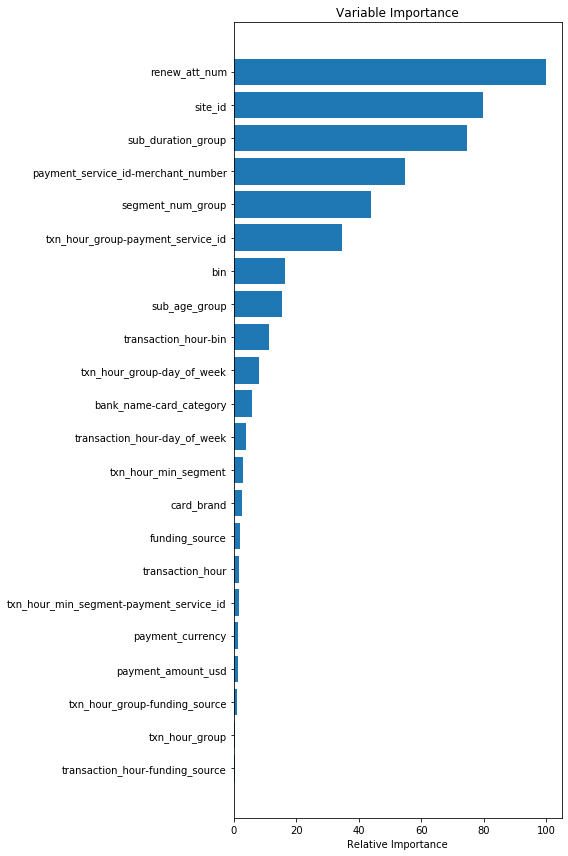

In [40]:
""" Train the model"""
if training_runner is None:
    version = get_latest_version(model_id, model_type) + 1
    model_name = model_id + '.' + str(version)
    features_dict['model_name'] = model_name
    output_dir=None

clf, result_d = build_and_train(
    input_data, 
    classifier, 
    tuned_parameters, 
    alg_name, 
    model_file, 
    best_param=best_parameters, 
    features_dict=features_dict, 
    test_data=_df_test,
    output_dir=output_dir)
                                   
print("result_dict: ", result_d)

In [41]:
'''
output the model
'''

start_date = '2020-09-16'
end_date = '2020-10-27'
if training_runner is None:
#     version = get_latest_version(model_id, model_type) + 1
#     model_name = model_id + '.' + str(version)
    model_file, model_file_name = write_model(clf, model_name)
    
    preprocess_repo_path = handle_preprocessing_file(model_id, version)
    size_desc = str(", original size: %s (fail: %s, success: %s), balanced_size: %s" % (original_size, fail_size, success_size, original_size))
    desc = f'TOD for Brazil. Add txn_hour_group as single feature. Exclude some txn_hour_min_segment.  Eval metric: ROC. Rsm: 0.45, early_stopping_rounds: 800. Update hyper parameters. Train data until 2020-10-27. Eval data: 10/27 ~ 10/29. Test data: 10/30~10/31.  Adding back payment_service_id. Add payment_method-id-issuer_country. Remove site_id-payment_method-id-currency-issuer_country. Update depth:6. reg:2.0.  Add txn_hour, txn_hour_group as single feature. Remove day_of_month.  Add site_id-payment_method-id-currency-issuer_country to replace payment_service_id.  Remove is_first_renewal. Add card_brand and funding_source to feature_cat. Remove payment_service_id as features. Updated subs data except sub_expire_2020-10. Revert hour_group. Revert l2_leaf_reg. Pass the configured txn_hour_group into features_dict. Using new txn_hour_group. Add txn_hour_min_segment with funding_source. Using spread txn_hours data after 2020-09-16.   Add site_id. Add payment_amount_usd. Depth:5. Remove issuer country. Include all renew_att. Use txn_hour_min_segment to aggregate instead of thx_hour_group. Add card_brand-funding_source, txn_hour_min_segment. Only include date_increment is na. Include duration_group, sub_age_group and segment_num_group. With new ROC AUC using predict_proba. No oversampling failed samples. Add txn_hour_group. {start_date}_{end_date}_for training data, 2020-05 for eval data, 2020-07 for test data, eval_metric=AUC. Size: {size_desc}'

    hyper_params = result_d.pop('hyper_params', None)
    extended_att = {"preprocess_repo_path": preprocess_repo_path, "input_features": input_features}
    repo_path = upload_artifact(model_file_name)
    insert_model_info(model_id, version, repo_path, desc=desc, model_type=model_type,eval_metrics=json.dumps(result_d), 
                      hyper_parameter=json.dumps(hyper_params), extended_att=json.dumps(extended_att), features_dict=features_dict, algorithm='CatBoostClassifier')
    
else:
    model_file = joblib.dump(clf, model_file)

print('model_file generated: ', model_file)

<Response [201]>
http://nexus-master.digitalriverws.net/nexus/repository/foundationreleases/com/digitalriver/prediction-service/ML-TOD/2_90_preprocessing/ML-TOD-2_90_preprocessing.py
[com.digitalriver.prediction-service:ML-TOD:2_90_preprocessing::py]


The following files were uploaded to repository foundationreleases


<Response [201]>
http://nexus-master.digitalriverws.net/nexus/repository/foundationreleases/com/digitalriver/prediction-service/ML-TOD/2.90/ML-TOD-2.90.pkl
[com.digitalriver.prediction-service:ML-TOD:2.90::pkl]
Model ML-TOD-2 version 90 is inserted into model repo
model_file generated:  ['/var/spark/ml_files/models/ML-TOD-2.90.pkl']


The following files were uploaded to repository foundationreleases
